In [361]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [362]:
def monte_carlo_simulation(pity_s, guarantee, amount):
    char_result = []
    roll_to_limited_s = []
    rng_result = []
    # base probability
    prob_s = 0.006
    prob_a = 0.0705
    prob_b = 0.9235
    prob_guarantee_s = 0.5
    
    # hitung probabilitas kumulatif
    cum_prob_s = prob_s
    cum_prob_a = cum_prob_s + prob_a
    cum_prob_b = cum_prob_a + prob_b
    
    # track the amount of character
    count_standard_s = 0
    count_limited_s = 0
    count_a = 0
    count_b = 0
    
    # pity system
    pity_s = pity_s
    pity_a = 0
    # pity counter
    count_pity_s = 0
    count_pity_a = 0
    
    # check guarantee
    is_guarantee = guarantee
    
    # looping
    for i in range(amount):
        # random number
        roll = random.random()
        
        if pity_s >= 89:
            pity_s = 0
            pity_a = 0
            count_pity_s += 1
            if is_guarantee:
                count_limited_s += 1
                char_result.append('LS')
                roll_to_limited_s.append(i+1)
                is_guarantee = False
            else:
                if random.random() < prob_guarantee_s:
                    count_limited_s += 1
                    char_result.append('LS')
                    roll_to_limited_s.append(i+1)
                else:
                    count_standard_s += 1
                    char_result.append('S')
                    is_guarantee = True
        else:
            if roll < cum_prob_s:
                pity_s = 0
                pity_a = 0
                if is_guarantee:
                    count_limited_s += 1
                    char_result.append('LS')
                    is_guarantee = False
                    roll_to_limited_s.append(i+1)
                else:
                    if random.random() < prob_guarantee_s:
                        count_limited_s += 1
                        char_result.append('LS')
                        roll_to_limited_s.append(i+1)
                    else:
                        count_standard_s += 1
                        char_result.append('S')
                        is_guarantee = True
            elif roll < cum_prob_a:
                count_a += 1
                pity_s += 1
                pity_a = 0
                char_result.append('A')
            else:
                if pity_a >= 9:
                    count_a += 1
                    pity_s += 1
                    pity_a = 0
                    count_pity_a += 1
                    char_result.append('A')
                else:
                    count_b += 1
                    pity_s += 1
                    pity_a += 1
                    char_result.append('B')
        rng_result.append(roll)
    
    # summary
    print('Base Probabilty Karakter')
    print(f'probability S: {prob_s}\nprobability A: {prob_a}\nprobability B: {prob_b}')
    print(f'\nProbabilitas Kumulatif')
    print(f'Probabilitas S: {cum_prob_s}\nProbabilitas A: {cum_prob_a}\nProbabilitas B: {cum_prob_b}')
    
        
    
    return rng_result, char_result, roll_to_limited_s, count_limited_s, count_standard_s, count_a, count_b, count_pity_s, count_pity_a

## Input pity awal dan total simulasi

In [363]:
pity_awal = 11
guarantee = True
total_sim = 1000000

roll_cost = 160

#jika pity awal 90 maka reset jadi 0 jika melebihi 90 maka sisa dibagi 90
pity_awal = pity_awal if pity_awal < 90 else pity_awal%90
print(f'pity awal : {pity_awal}')

pity awal : 11


## Jalankan Simulasi

In [364]:
rng_result, char_result, roll_to_limited_s, count_limited_s, count_standart_s, count_a, count_b, amount_pity_s, amount_pity_a = monte_carlo_simulation(pity_awal, guarantee, total_sim)

Base Probabilty Karakter
probability S: 0.006
probability A: 0.0705
probability B: 0.9235

Probabilitas Kumulatif
Probabilitas S: 0.006
Probabilitas A: 0.0765
Probabilitas B: 1.0


## Hasil Simulasi

In [365]:
#jumlah total karakter S 
count_s = count_limited_s + count_standart_s
#probabilitas karakter
prob_limited_s = count_limited_s/total_sim
prob_s = count_s/total_sim
prob_a = count_a/total_sim
prob_b = count_b/total_sim

print(f'Hasil simulasi setelah {total_sim} kali pull')

print(f'\nJumlah karakter\n---------------------')
print(f'Limited S: {count_limited_s}')
print(f'S: {count_s}')
print(f'A: {count_a}')
print(f'B: {count_b}')

print(f'\nProbabilitas karakter \n---------------------')
print(f'Limited S: {prob_limited_s*100:.2f}%')
print(f'S: {prob_s*100:.2f}%')
print(f'A: {prob_a*100:.2f}%')
print(f'B: {prob_b*100:.2f}%')

Hasil simulasi setelah 1000000 kali pull

Jumlah karakter
---------------------
Limited S: 9525
S: 14261
A: 129459
B: 856280

Probabilitas karakter 
---------------------
Limited S: 0.95%
S: 1.43%
A: 12.95%
B: 85.63%


### Karakter S in General

In [366]:
# average pull needed (ditambah 1 karena index mulai dari 0)
rolls_to_get_s = [index + 1 for index, char in enumerate(char_result) if char == 'S' or char == 'LS']
print(f'Rolls at which character S was obtained: {rolls_to_get_s}')

first_roll = rolls_to_get_s[0]+pity_awal
interval_rolls_to_s = [first_roll] + [rolls_to_get_s[i] - rolls_to_get_s[i-1] for i in range(1, len(rolls_to_get_s))]

print(f'Rolls to get character S: {interval_rolls_to_s}')

print(f'\n\nSummary\n---------------------')
average_s = np.mean(interval_rolls_to_s)
print(f'Average rolls to get character S: {average_s:.1f} Pulls')
print(f'Average cost to get character S: {average_s*roll_cost:.1f} Polychromes')

#pull needed to get the character from pity awal
print(f'---------------------')
print(f'Pity awal : {pity_awal}')
pull_needed = average_s - pity_awal 
print(f'Pull needed to get the character based on pity awal : {pull_needed:.0f} Pulls')
print(f'Cost needed to get limited character S: {pull_needed*roll_cost:.0f} Polychromes')


print(f'\nPity\n---------------------')
print(f'Amount of pity S: {amount_pity_s}')
print(f'Probability of getting unlucky: {(amount_pity_s/total_sim)*100:.3f}%')

Rolls at which character S was obtained: [79, 150, 240, 330, 369, 459, 532, 622, 703, 793, 816, 906, 996, 1086, 1176, 1266, 1356, 1446, 1530, 1537, 1627, 1634, 1724, 1814, 1904, 1994, 2084, 2167, 2212, 2275, 2365, 2455, 2545, 2635, 2710, 2740, 2830, 2920, 3010, 3089, 3126, 3216, 3230, 3320, 3354, 3444, 3492, 3514, 3604, 3694, 3784, 3853, 3943, 4033, 4109, 4179, 4269, 4359, 4449, 4539, 4573, 4663, 4753, 4843, 4933, 4949, 5039, 5129, 5206, 5296, 5386, 5476, 5566, 5622, 5710, 5716, 5806, 5858, 5934, 6024, 6114, 6204, 6287, 6377, 6418, 6508, 6598, 6688, 6713, 6803, 6893, 6983, 7073, 7163, 7194, 7284, 7374, 7464, 7554, 7591, 7681, 7704, 7794, 7878, 7968, 8018, 8108, 8198, 8288, 8378, 8468, 8558, 8632, 8722, 8752, 8842, 8913, 9003, 9020, 9110, 9111, 9201, 9291, 9381, 9382, 9472, 9496, 9586, 9676, 9766, 9822, 9855, 9861, 9944, 10034, 10051, 10120, 10138, 10228, 10290, 10380, 10470, 10521, 10611, 10701, 10791, 10881, 10928, 10981, 11071, 11161, 11251, 11341, 11347, 11437, 11527, 11595, 11685, 

### Karakter Limited S

In [367]:
print(roll_to_limited_s)
#Check if got limited character S first
#Kalo gadapet limited duluan gaperlu ditambah dg pity awal
first_roll = roll_to_limited_s[0] if rolls_to_get_s[0]<roll_to_limited_s[0] else roll_to_limited_s[0] + pity_awal

interval_limited_s = [first_roll] + [roll_to_limited_s[i] - roll_to_limited_s[i-1] for i in range(1, len(roll_to_limited_s))]
print(f'\nRolls at which limited character S was obtained: \n{interval_limited_s}')

print(f'\n\nSummary\n---------------------')
average_limited_s = np.mean(interval_limited_s)
print(f'Average rolls to get limited character S: {average_limited_s:.1f} Pulls')
print(f'Average cost to get limited character S: {average_limited_s*roll_cost:.1f} Polychromes')

#pull needed to get the character from pity awal
print(f'---------------------')
print(f'Pity awal : {pity_awal}')
print(f'Pull needed to get the character based on pity awal : {average_limited_s - pity_awal:.0f} Pulls')
print(f'Cost needed to get limited character S: {(average_limited_s - pity_awal)*roll_cost:.0f} Polychromes')

#pity counter
amount_pity_limited_s = interval_limited_s.count(90)
print(f'\nPity\n---------------------')
print(f'Amount of pity S: {amount_pity_limited_s}')
print(f'Probability of getting unlucky {(amount_pity_limited_s/total_sim)*100:.3f}%')

[79, 240, 330, 459, 622, 703, 816, 996, 1176, 1266, 1356, 1530, 1627, 1724, 1814, 1994, 2084, 2212, 2275, 2365, 2545, 2635, 2740, 2920, 3010, 3126, 3230, 3320, 3444, 3492, 3514, 3604, 3694, 3784, 3943, 4109, 4269, 4359, 4449, 4573, 4753, 4843, 4949, 5039, 5206, 5386, 5476, 5566, 5622, 5710, 5806, 5858, 5934, 6114, 6204, 6377, 6508, 6598, 6713, 6803, 6893, 7073, 7163, 7194, 7374, 7554, 7591, 7704, 7794, 7878, 8018, 8198, 8288, 8468, 8558, 8632, 8722, 8842, 8913, 9003, 9020, 9111, 9291, 9382, 9472, 9496, 9586, 9676, 9766, 9855, 9861, 10034, 10120, 10138, 10228, 10380, 10521, 10611, 10791, 10928, 11071, 11161, 11251, 11341, 11437, 11595, 11775, 11925, 12105, 12246, 12272, 12452, 12494, 12584, 12610, 12657, 12747, 12876, 12966, 13024, 13114, 13204, 13294, 13356, 13446, 13536, 13716, 13806, 13896, 13987, 14009, 14064, 14154, 14243, 14341, 14372, 14439, 14541, 14564, 14668, 14691, 14871, 15032, 15125, 15215, 15381, 15530, 15635, 15716, 15822, 15890, 16070, 16165, 16268, 16368, 16458, 16503, 

## Tabel

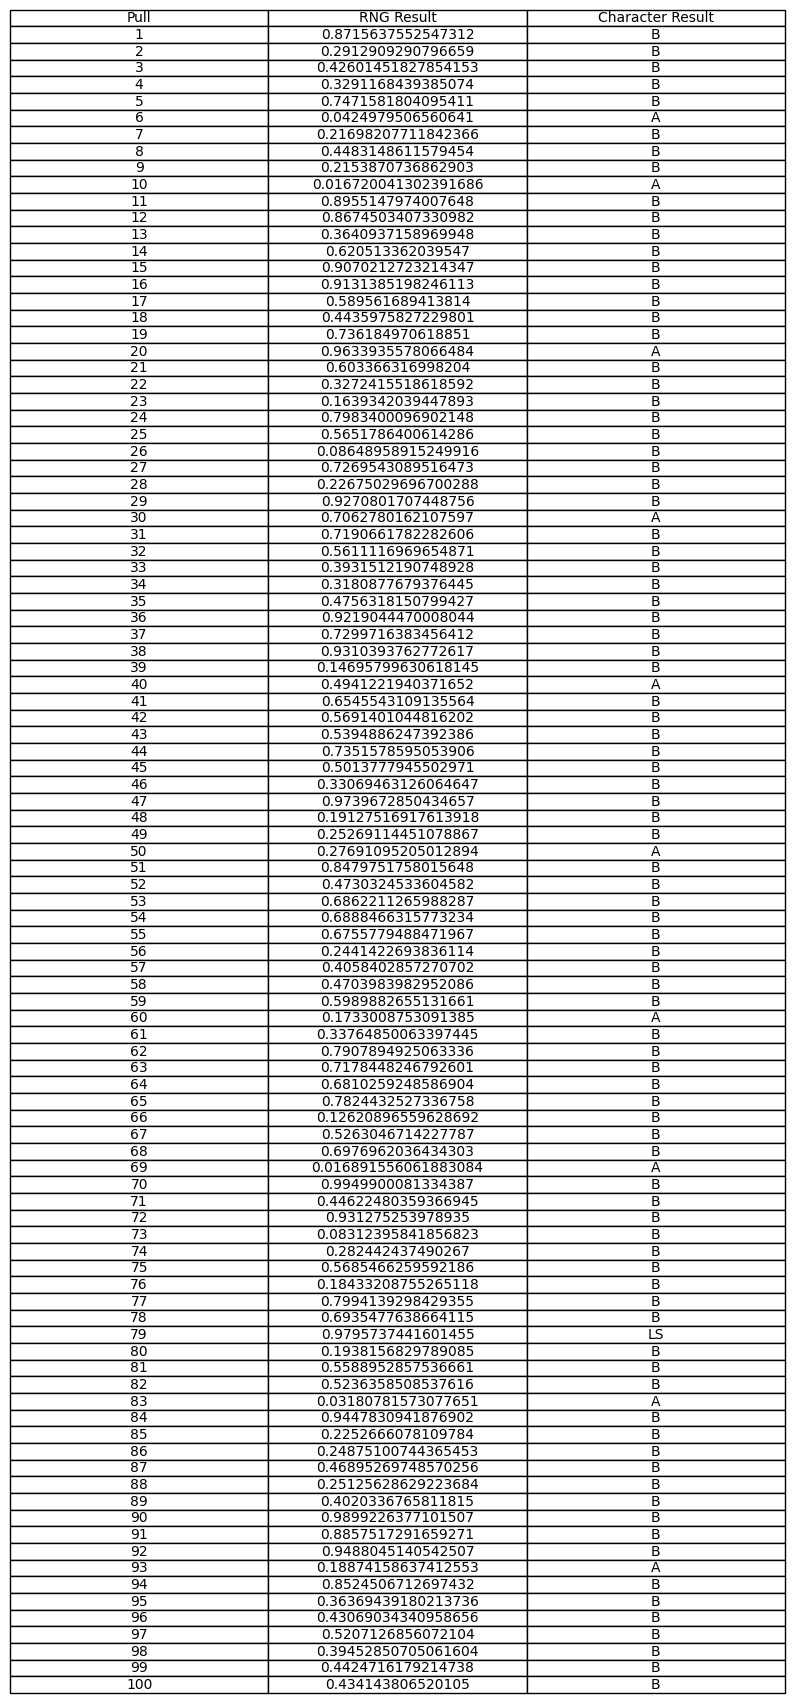

In [368]:
data = {
    'Pull': range(1, total_sim + 1),
    'RNG Result': rng_result,
    'Character Result': char_result
}

df = pd.DataFrame(data)

# Plot the table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')
table = ax.table(cellText=df.head(100).values, colLabels=df.columns, cellLoc='center', loc='center')

plt.show()

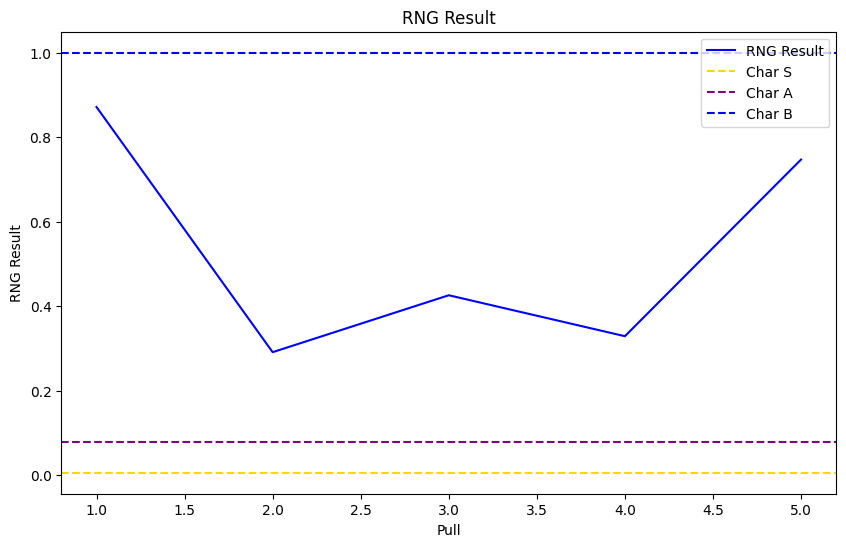

In [369]:
plt.figure(figsize=(10, 6))
plt.plot(df['Pull'].head(5), df['RNG Result'].head(5), color='blue', label='RNG Result')
plt.axhline(y=0.006, color='gold', linestyle='--', label='Char S')
plt.axhline(y=0.078, color='purple', linestyle='--', label='Char A')
plt.axhline(y=1, color='blue', linestyle='--', label='Char B')
plt.xlabel('Pull')
plt.ylabel('RNG Result')
plt.title('RNG Result')
plt.legend(loc='upper right')
plt.show()